# Статистика, DS-поток
## Задание SP.3

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 3 &mdash; 80 баллов
* Задача 4 &mdash; 60 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [ ]:
# Bot check

# HW_ID: ds_sp3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [119]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5, palette='Set2')

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением (см. задание ST.3). Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя функцию из задания SP.2. Нужно нанести на график точки выборки.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

In [54]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка', label_interval='Интервал'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    
    n_range = np.arange(1, left.shape[0] + 1)
    plt.fill_between(x=n_range, y1=left, y2=right, color=color_interval, alpha=0.5, label=label_interval)
    if sample is not None:
        plt.hlines(sample, n_range[0], n_range[-1], color=color_sample, alpha=0.3)
    plt.ylim(ylim)
    if estimation is not None:
        plt.plot(n_range, estimation, color=color_estimation, label=label_estimation)

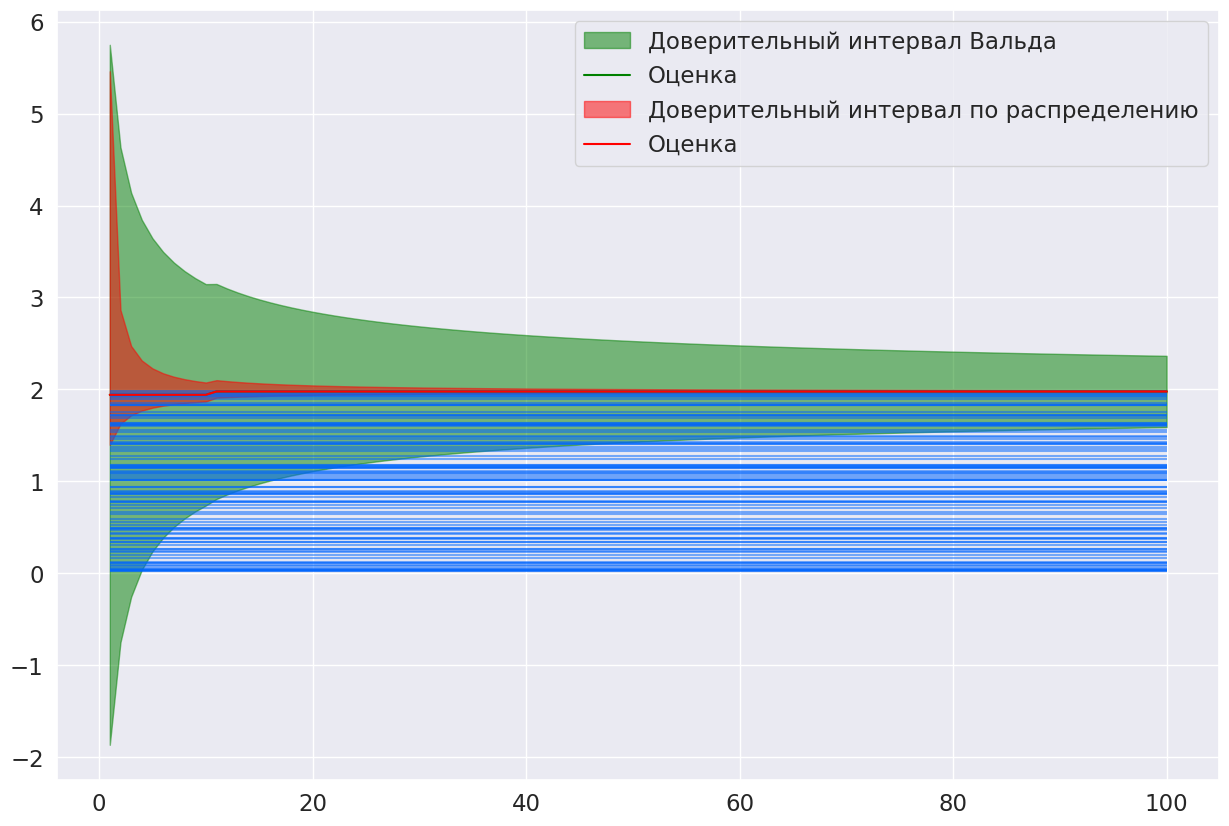

In [109]:
plt.figure(figsize=(15, 10))
theta = 2.0
n = 100
n_range = np.arange(1, n + 1)
X = sps.uniform(loc=0, scale=theta).rvs((100, ))
est_vald = np.maximum.accumulate(X)
disp = n_range / ((n_range + 1) ** 2 * (n_range + 2))
left_vald = est_vald - sps.norm.ppf((1 + 0.95) / 2) * est_vald / np.sqrt(n_range)
right_vald = est_vald + sps.norm.ppf((1 + 0.95) / 2) * est_vald / np.sqrt(n_range)
draw_confidence_interval(left_vald, right_vald, est_vald, X, color_interval='green', color_estimation='green', label_interval='Доверительный интервал Вальда')
est_approx = np.maximum.accumulate(X)
left_approx = n_range * est_approx / (n_range + np.log(1 + 0.95 / 2))
right_approx = n_range * est_approx / (n_range + np.log(1 - 0.95 / 2))
draw_confidence_interval(left_approx, right_approx, est_approx, X, color_interval='red', color_estimation='red', label_interval='Доверительный интервал по распределению')
plt.legend()
plt.show()

Сравните два исследуемых интервала по величине доли покрытия истинного значения $\theta$. Посмотрите примеры в ноутбуке с семинара.

In [103]:
def get_coverage_rate(left, right, theta):
    return np.mean(
        (left <= theta * np.ones(left.shape)) & (theta * np.ones(right.shape) <= right),
        axis=-1,
    )

vald_cov = get_coverage_rate(left_vald, right_vald, theta)
approx_cov = get_coverage_rate(left_approx, right_approx, theta)
print('Доля покрытия доверительным интервалом Вальда:', vald_cov)
print('Доля покрытия доверительным интервалом по распределению:', approx_cov)

Доля покрытия доверительным интервалом Вальда: 0.96
Доля покрытия доверительным интервалом по распределению: 0.8


**Вывод:** второй способ даёт более узкий доверительный интервал, но из-за этого истинное значение $\theta$ начинает покрываться позже.

__________________
## Задача 2.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал:

$$
a\in \left(\overline{X}\pm z_\frac{1+\alpha}{2}\frac{S}{\sqrt{n-1}}\right)
$$

Точный доверительный интервал:

$$
a\in \left(\overline{X}\pm \frac{T_{n-1,\frac{1+\alpha}{2}}}{\sqrt{n-1}}S\right)
$$

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [116]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """
    Вычисление асимптотического доверительного интервала в зависимости от n

    Параметры
    ----------
    sample : np.array
        Выборка
    alpha : float
        Уровень доверия
    """
    
    cummean = np.cumsum(sample) / np.arange(1, sample.shape[0] + 1)
    cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))
    left = cummean - cums * sps.norm.ppf((1 + alpha) / 2)
    right = cummean + cums * sps.norm.ppf((1 + alpha) / 2)
    return np.hstack((left.reshape(-1, 1), right.reshape(-1, 1)))

def calculate_confidence_intervals(sample, alpha=0.95):
    """
    Вычисление доверительного интервала с помощью распределение Стьюдента в зависимости от n

    Параметры
    ----------
    sample : np.array
        Выборка
    alpha : float
        Уровень доверия
    """

    cummean = np.cumsum(sample) / np.arange(1, sample.shape[0] + 1)
    cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))
    left = cummean - cums * sps.t(np.arange(1, sample.shape[0] + 1)).ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, sample.shape[0] + 1))
    right = cummean + cums * sps.t(np.arange(1, sample.shape[0] + 1)).ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, sample.shape[0] + 1))
    return np.hstack((left.reshape(-1, 1), right.reshape(-1, 1)))


Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

/tmp/ipykernel_213577/4061271048.py:14: RuntimeWarning: invalid value encountered in divide
  cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))
/tmp/ipykernel_213577/4061271048.py:32: RuntimeWarning: invalid value encountered in divide
  cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))


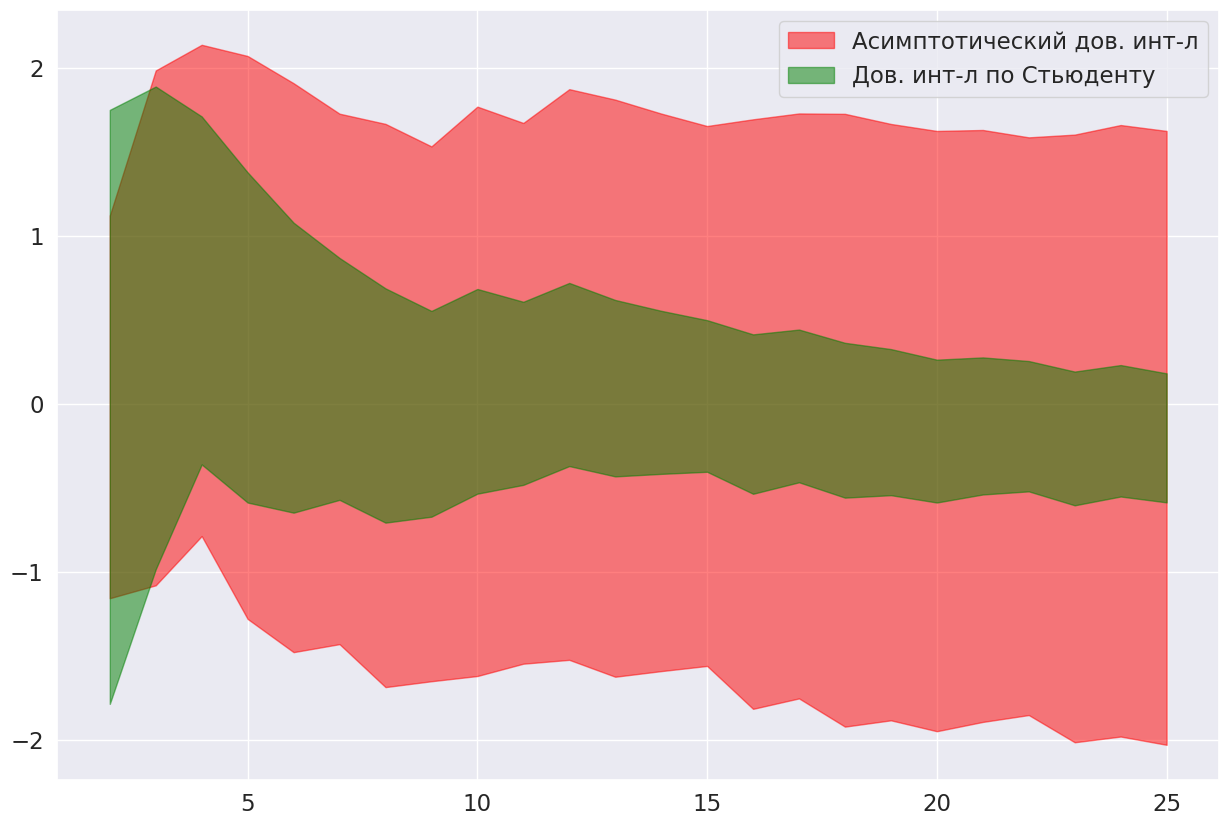

In [84]:
X = sps.norm.rvs(size=(25, ))
asymp_conf = calculate_asymptotic_confidence_intervals(X)
t_conf = calculate_confidence_intervals(X)
plt.figure(figsize=(15, 10))
draw_confidence_interval(left=asymp_conf[:, 0], right=asymp_conf[:, 1], color_interval='red', label_interval='Асимптотический дов. инт-л')
draw_confidence_interval(left=t_conf[:, 0], right=t_conf[:, 1], color_interval='green', label_interval='Дов. инт-л по Стьюденту')
plt.legend()
plt.show()

Сравните также эти интервалы по величине доли покрытия истинного значения параметра сдвига.

In [85]:
asymp_frac = get_coverage_rate(asymp_conf[:, 0], asymp_conf[:, 1], 0)
t_frac = get_coverage_rate(t_conf[:, 0], t_conf[:, 1], 0)
print('Доля покрытия для асимпт. интервала: {}'.format(asymp_frac))
print('Доля покрытия для интервала по Стьюденту: {}'.format(t_frac))

Доля покрытия для асимпт. интервала: 0.96
Доля покрытия для интервала по Стьюденту: 0.96


**Вывод:** Вычисление доверительного интервала с использованием распределения Стьюдента даёт намного более узкий интервал без потери в точности (доля покрытия оказывается примерно такой же, что и для асимптотического).

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [88]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109)

In [126]:
cols = ['Alcalinity_of_ash', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Hue']
X = wine.data.features[cols][wine.data.targets['class'] == 1].values.T
asymp_conf = np.array([
    calculate_asymptotic_confidence_intervals(X[0])[-1],
    calculate_asymptotic_confidence_intervals(X[1])[-1],
    calculate_asymptotic_confidence_intervals(X[2])[-1],
    calculate_asymptotic_confidence_intervals(X[3])[-1],
])
t_conf = np.array([
    calculate_confidence_intervals(X[0])[-1],
    calculate_confidence_intervals(X[1])[-1],
    calculate_confidence_intervals(X[2])[-1],
    calculate_confidence_intervals(X[3])[-1],
])
result = pd.DataFrame({
    ('Асимптотический', 'min'): asymp_conf[:, 0],
    ('Асимптотический', 'max'): asymp_conf[:, 1],
    ('По Стюденту', 'min'): t_conf[:, 0],
    ('По Стюденту', 'max'): t_conf[:, 1],
},
index=cols)
result

/tmp/ipykernel_213577/4061271048.py:14: RuntimeWarning: invalid value encountered in divide
  cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))
/tmp/ipykernel_213577/4061271048.py:32: RuntimeWarning: invalid value encountered in divide
  cums = np.sqrt(np.cumsum((sample - cummean) ** 2) / np.arange(0, sample.shape[0]))


Асимптотический            По Стюденту           
                                 min        max         min        max
Alcalinity_of_ash          12.247876  21.826700   16.400706  17.673870
Nonflavanoid_phenols        0.155862   0.424138    0.272171   0.307829
Proanthocyanins             1.128977   2.669667    1.796932   2.001712
Hue                         0.838822   1.285246    1.032366   1.091702

**Вывод:** использование распределения Стьюдента при построении доверительного интервала позволяет получить существенно более узкий интервал при том же уровне доверия.

__________________
## Задача 3. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

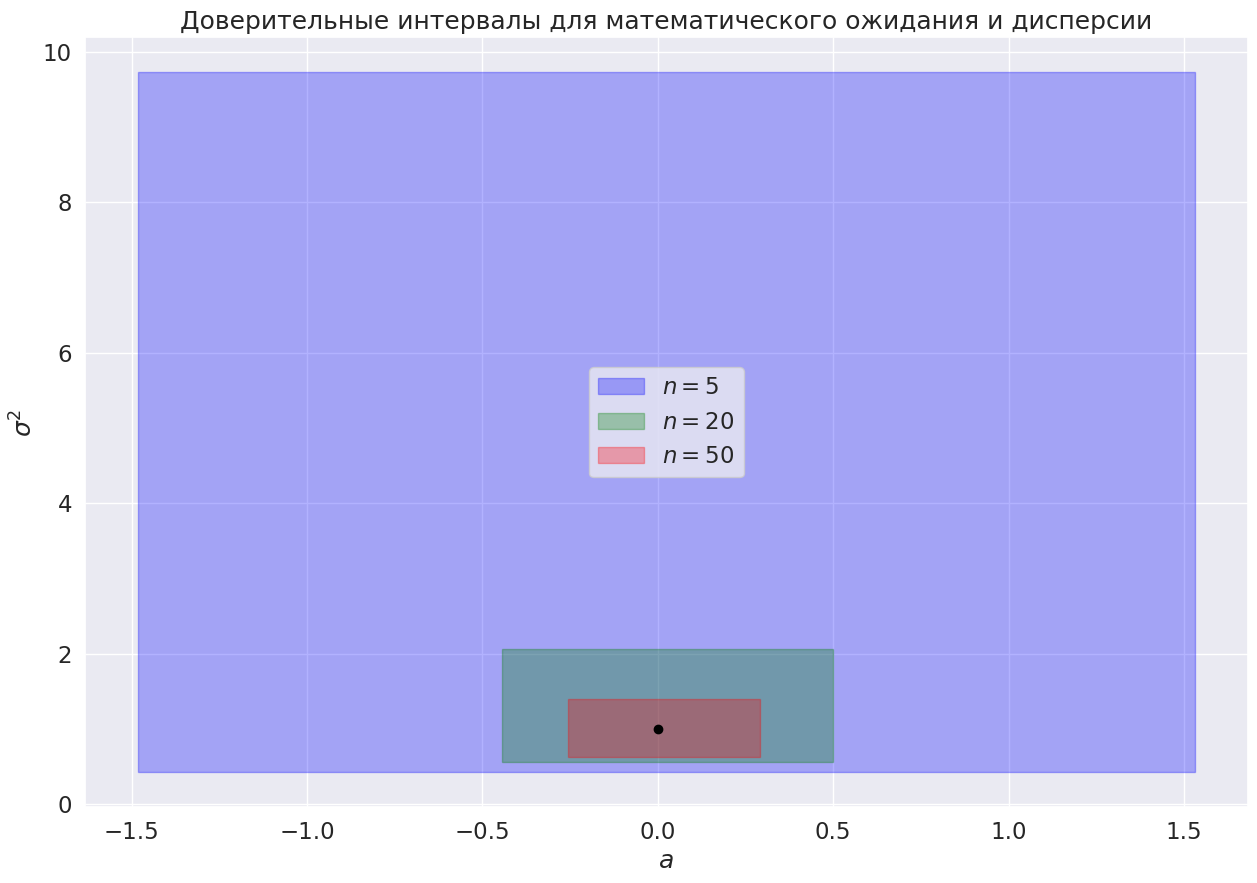

In [72]:
X3 = sps.norm.rvs(size=(50,))
X1 = X3[:5]
X2 = X3[:20]

plt.figure(figsize=(15, 10))

int_mean_1 = (np.mean(X1) - sps.t(4).ppf((1 + 0.95) / 2) * np.sqrt(5 / 4 ** 2 * np.var(X1)), np.mean(X1) + sps.t(4).ppf((1 + 0.95) / 2) * np.sqrt(5 / 4 ** 2 * np.var(X1)))
int_mean_2 = (np.mean(X2) - sps.t(19).ppf((1 + 0.95) / 2) * np.sqrt(20 / 19 ** 2 * np.var(X2)), np.mean(X2) + sps.t(19).ppf((1 + 0.95) / 2) * np.sqrt(20 / 19 ** 2 * np.var(X2)))
int_mean_3 = (np.mean(X3) - sps.t(49).ppf((1 + 0.95) / 2) * np.sqrt(50 / 49 ** 2 * np.var(X3)), np.mean(X3) + sps.t(49).ppf((1 + 0.95) / 2) * np.sqrt(50 / 49 ** 2 * np.var(X3)))

int_disp_1 = (5 * np.var(X1) / sps.chi2(4).ppf((1 + 0.95) / 2), 5 * np.var(X1) / sps.chi2(4).ppf((1 - 0.95) / 2))
int_disp_2 = (20 * np.var(X2) / sps.chi2(19).ppf((1 + 0.95) / 2), 20 * np.var(X2) / sps.chi2(19).ppf((1 - 0.95) / 2))
int_disp_3 = (50 * np.var(X3) / sps.chi2(49).ppf((1 + 0.95) / 2), 50 * np.var(X3) / sps.chi2(49).ppf((1 - 0.95) / 2))

fig1_x = [int_mean_1[0], int_mean_1[0], int_mean_1[1], int_mean_1[1]]
fig1_y = [int_disp_1[0], int_disp_1[1], int_disp_1[1], int_disp_1[0]]
fig2_x = [int_mean_2[0], int_mean_2[0], int_mean_2[1], int_mean_2[1]]
fig2_y = [int_disp_2[0], int_disp_2[1], int_disp_2[1], int_disp_2[0]]
fig3_x = [int_mean_3[0], int_mean_3[0], int_mean_3[1], int_mean_3[1]]
fig3_y = [int_disp_3[0], int_disp_3[1], int_disp_3[1], int_disp_3[0]]

plt.fill(fig1_x, fig1_y, color='b', label='$n=5$', alpha=0.3)
plt.fill(fig2_x, fig2_y, color='g', label='$n=20$', alpha=0.3)
plt.fill(fig3_x, fig3_y, color='r', label='$n=50$', alpha=0.3)

plt.scatter([0.0], [1.0], color='black')

plt.xlabel('$a$')
plt.ylabel('$\\sigma^2$')
plt.title('Доверительные интервалы для математического ожидания и дисперсии')
plt.legend()
plt.show()

Исследуйте построенную доверительную область по величине доли покрытия параметра $\theta$.

In [81]:
(int((int_mean_1[0] <= 0.0) & (0.0 <= int_mean_1[1]) & (int_disp_1[0] <= 1.0) & (1.0 <= int_disp_1[1])) + int((int_mean_2[0] <= 0.0) & (0.0 <= int_mean_2[1]) & (int_disp_2[0] <= 1.0) & (1.0 <= int_disp_2[1])) + int((int_mean_3[0] <= 0.0) & (0.0 <= int_mean_3[1]) & (int_disp_3[0] <= 1.0) & (1.0 <= int_disp_3[1]))) / 3

1.0

**Вывод:** При $n$ уже порядка 50 доверительный интервал оказывается достаточно узким и покрывает истинное значение параметра.